In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
data = {
    'text': [
        "I love this product! It's amazing 😍",
        "Worst experience ever. Totally disappointed.",
        "Meh, it was okay. Nothing special.",
        "Absolutely fantastic service, will buy again!",
        "Terrible! Do not recommend to anyone.",
        "I’m happy with the results, good quality.",
        "It's not worth the price.",
        "Neutral thoughts on this, still deciding.",
        "Exceeded my expectations!",
        "This is the worst I've used."
    ],
    'sentiment': [
        "positive", "negative", "neutral", "positive", "negative",
        "positive", "negative", "neutral", "positive", "negative"
    ]
}

df = pd.DataFrame(data)
df.head()

,text,sentiment
0,I love this product! It's amazing 😍,positive
1,Worst experience ever. Totally disappointed.,negative
2,"Meh, it was okay. Nothing special.",neutral
3,"Absolutely fantastic service, will buy again!",positive
4,Terrible! Do not recommend to anyone.,negative


In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove links
    text = re.sub(r'\@w+|\#','', text)  # remove mentions/hashtags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # remove stopwords
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()

,text,sentiment,clean_text
0,I love this product! It's amazing 😍,positive,love product amazing
1,Worst experience ever. Totally disappointed.,negative,worst experience ever totally disappointed
2,"Meh, it was okay. Nothing special.",neutral,meh okay nothing special
3,"Absolutely fantastic service, will buy again!",positive,absolutely fantastic service buy
4,Terrible! Do not recommend to anyone.,negative,terrible recommend anyone


In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove links
    text = re.sub(r'\@w+|\#','', text)  # remove mentions/hashtags
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # remove stopwords
    return text

df['clean_text'] = df['text'].apply(clean_text)
df.head()

,text,sentiment,clean_text
0,I love this product! It's amazing 😍,positive,love product amazing
1,Worst experience ever. Totally disappointed.,negative,worst experience ever totally disappointed
2,"Meh, it was okay. Nothing special.",neutral,meh okay nothing special
3,"Absolutely fantastic service, will buy again!",positive,absolutely fantastic service buy
4,Terrible! Do not recommend to anyone.,negative,terrible recommend anyone


In [12]:
X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
model = LogisticRegression(multi_class='ovr')
model.fit(X_train_tfidf, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [15]:
y_pred = model.predict(X_test_tfidf)

In [16]:
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, labels=[0, 1, 2], target_names=["negative", "positive", "neutral"]
))


Classification Report:
               precision    recall  f1-score   support

    negative       0.33      1.00      0.50         1
    positive       0.00      0.00      0.00         2
     neutral       0.00      0.00      0.00         0

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

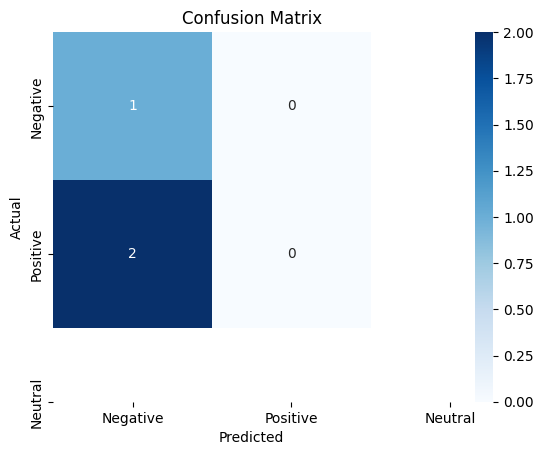

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=["Negative", "Positive", "Neutral"],
            yticklabels=["Negative", "Positive", "Neutral"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()








